In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('dataset/03242023_CNN_LSA.csv')

In [3]:
df.head()

,link,title,article,date,content,Summarized_Content_LSA
0,https://www.cnn.com/2023/03/24/us/lausd-strike...,Los Angeles Unified School District has reache...,us,2023-03-24,The Los Angeles Unified School District and Se...,the los angeles unified school district and se...
1,https://www.cnn.com/2023/03/24/us/atlanta-cop-...,Sections of park on site of proposed Atlanta’s...,us,2023-03-24,A large portion of a public park near Atlanta ...,a large portion of a public park near atlanta ...
2,https://www.cnn.com/2023/03/24/us/migrant-tran...,US immigration authorities have transferred 34...,us,2023-03-24,US Customs and Border Protection recently tran...,us customs and border protection recently tran...
3,https://www.cnn.com/2023/03/24/us/pennsylvania...,Pennsylvania school district sues Norfolk Sout...,us,2023-03-24,A Pennsylvania school district is suing Norfol...,a pennsylvania school district is suing norfol...
4,https://www.cnn.com/2023/03/24/us/pilots-safet...,Union urges pilots to ‘increase vigilance’ to ...,us,2023-03-24,The largest US airline pilots union is counsel...,the largest us airline pilots union is counsel...


In [4]:
df2 = df[['title', 'article', 'content', 'Summarized_Content_LSA']]

In [5]:
df2.head()

,title,article,content,Summarized_Content_LSA
0,Los Angeles Unified School District has reache...,us,The Los Angeles Unified School District and Se...,the los angeles unified school district and se...
1,Sections of park on site of proposed Atlanta’s...,us,A large portion of a public park near Atlanta ...,a large portion of a public park near atlanta ...
2,US immigration authorities have transferred 34...,us,US Customs and Border Protection recently tran...,us customs and border protection recently tran...
3,Pennsylvania school district sues Norfolk Sout...,us,A Pennsylvania school district is suing Norfol...,a pennsylvania school district is suing norfol...
4,Union urges pilots to ‘increase vigilance’ to ...,us,The largest US airline pilots union is counsel...,the largest us airline pilots union is counsel...


In [6]:
df2.article.unique()

array(['us', 'crime justice', 'Enery Environment', 'Space Science'],
      dtype=object)

In [7]:
import re
import nltk
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

def normalization(word):
    word= word.lower()
    word = word.replace("'re",' are').replace("'m", ' am').replace("'s",' is').replace("n't",' not').replace("'ve",' have').replace("'d",' had').replace("'ll",' will')
    word = word.replace("'",' ')
    word = re.sub(r'http\S+', ' ', word)
    word = word.replace("<br", ' ')
    word  = re.sub(r'[^\w\s]', ' ', word)
    word  = re.sub(r'[0-9]+', ' ', word)
    return word

def preprocess(data):
    result = []
    for line in data:
        word = normalization(line)
        word = word.lower().strip().split()
        stopwords = nltk.corpus.stopwords.words("english")
        word = [w for w in word if not w in stopwords]
        word = " ".join(word)
        result.append(word)
    return result

In [8]:
df2['Processed_Content'] = preprocess(df2['content'])

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dongj\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
def get_sentiment_label(sentiment_scores):
    compound_score = sentiment_scores['compound']
    if compound_score >= 0.05:
        sentiment_label = "Positive"
    elif compound_score > -0.05 and compound_score < 0.05:
        sentiment_label = "Neutral"
    else:
        sentiment_label = "Negative"
    return sentiment_label

In [11]:
sentiment_list =[]
for i in range(len(df2)):
    sentiment_list.append(get_sentiment_label(sia.polarity_scores(df2['Processed_Content'][i])))

In [12]:
from textblob import TextBlob

In [13]:
def get_subjectivity_label(subjectivity_score):
    if subjectivity_score < 0.5:
        subjectivity_label = "Objective"
    else:
        subjectivity_label = "Subjective"
    return subjectivity_label

In [14]:
subjectivity_list =[]
for i in range(len(df2)):
    blob = TextBlob(df2['Processed_Content'][i])
    subjectivity_score = blob.sentiment.subjectivity
    subjectivity_label = get_subjectivity_label(subjectivity_score)  
    subjectivity_list.append(subjectivity_label)

In [15]:
df2['sentiment'] = sentiment_list
df2['subjectivity'] = subjectivity_list 

In [16]:
df2.head(2)

,title,article,content,Summarized_Content_LSA,Processed_Content,sentiment,subjectivity
0,Los Angeles Unified School District has reache...,us,The Los Angeles Unified School District and Se...,the los angeles unified school district and se...,los angeles unified school district service em...,Positive,Objective
1,Sections of park on site of proposed Atlanta’s...,us,A large portion of a public park near Atlanta ...,a large portion of a public park near atlanta ...,large portion public park near atlanta propose...,Negative,Objective


In [17]:
df2_us = df2[df2.article=='us']
df2_cj = df2[df2.article=='crime justice']
df2_ee = df2[df2.article=='Enery Environment']
df2_ss = df2[df2.article=='Space Science']

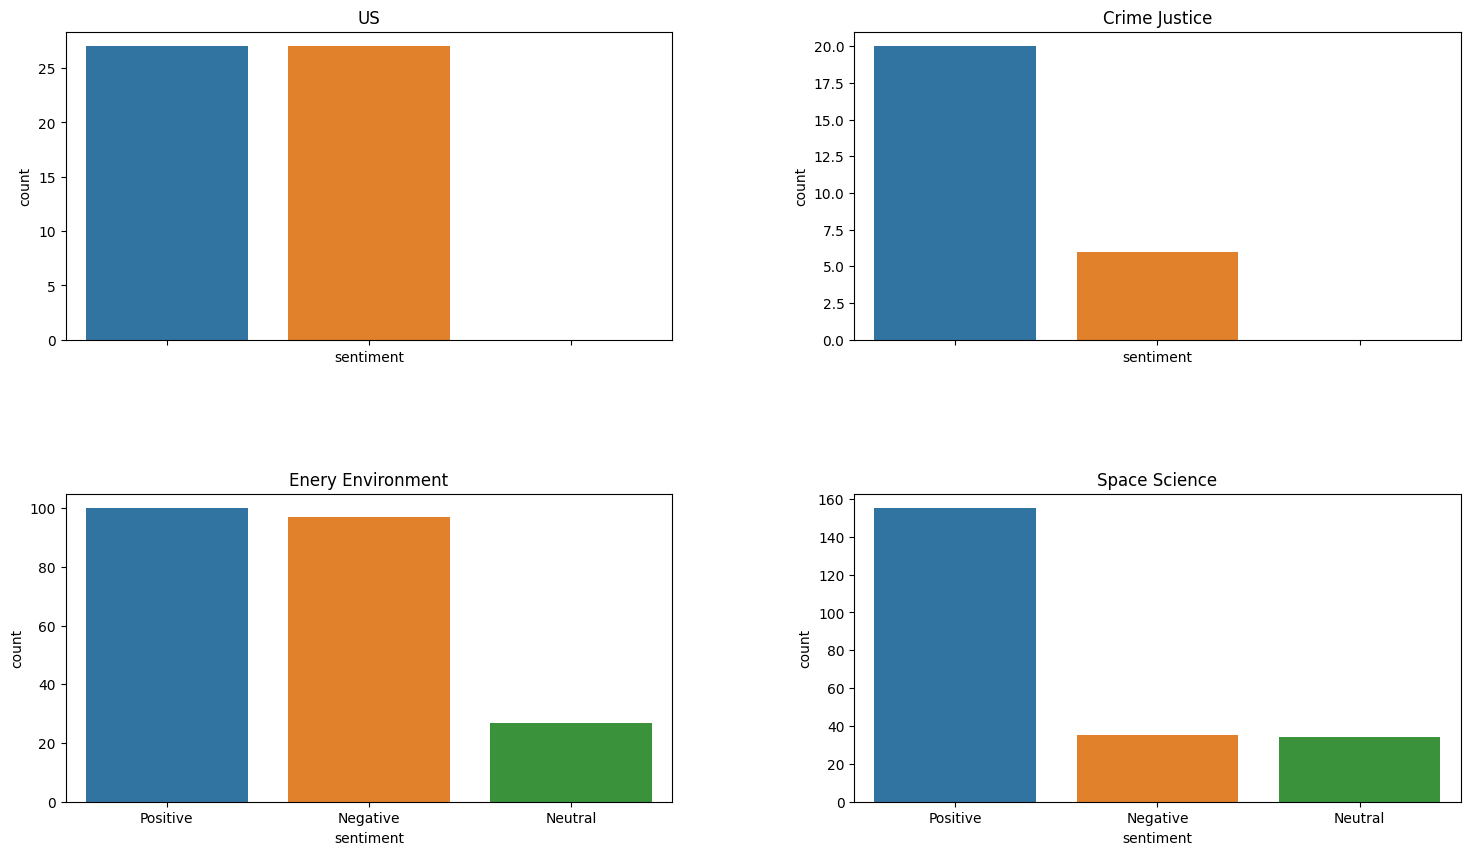

In [80]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(18,10))
sns.countplot(data =df2_us, x='sentiment', ax=axes[0][0])
axes[0][0].set_title('US')
sns.countplot(data =df2_cj, x='sentiment', ax=axes[0][1])
axes[0][1].set_title('Crime Justice')
sns.countplot(data =df2_ee, x='sentiment', ax=axes[1][0])
axes[1][0].set_title('Enery Environment')
sns.countplot(data =df2_ss, x='sentiment', ax=axes[1][1])
axes[1][1].set_title('Space Science')
plt.subplots_adjust(hspace=0.5, wspace=0.3)

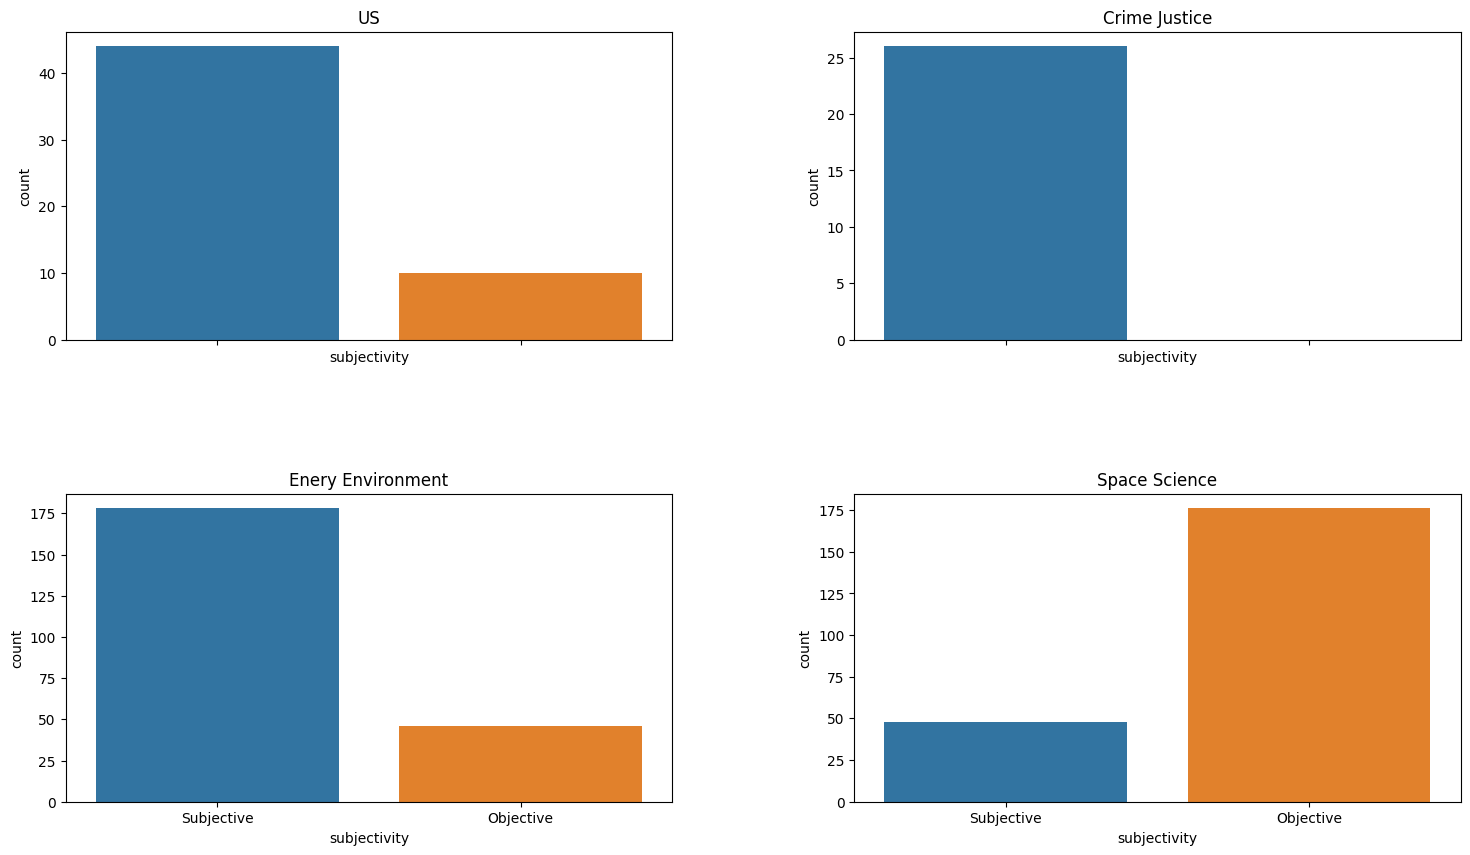

In [81]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(18,10))
sns.countplot(data =df2_us, x='subjectivity', ax=axes[0][0])
axes[0][0].set_title('US')
sns.countplot(data =df2_cj, x='subjectivity', ax=axes[0][1])
axes[0][1].set_title('Crime Justice')
sns.countplot(data =df2_ee, x='subjectivity', ax=axes[1][0])
axes[1][0].set_title('Enery Environment')
sns.countplot(data =df2_ss, x='subjectivity', ax=axes[1][1])
axes[1][1].set_title('Space Science')
plt.subplots_adjust(hspace=0.5, wspace=0.3)

In [20]:
us_wordcloud = WordCloud(background_color='white', max_words=200,max_font_size=40, random_state=42)\
                    .generate(str(list(df2_us['Processed_Content'])))
cj_wordcloud = WordCloud(background_color='white', max_words=200,max_font_size=40, random_state=42)\
                    .generate(str(list(df2_cj['Processed_Content'])))
ee_wordcloud = WordCloud(background_color='white', max_words=200,max_font_size=40, random_state=42)\
                    .generate(str(list(df2_ee['Processed_Content'])))
ss_wordcloud = WordCloud(background_color='white', max_words=200,max_font_size=40, random_state=42)\
                    .generate(str(list(df2_ss['Processed_Content'])))

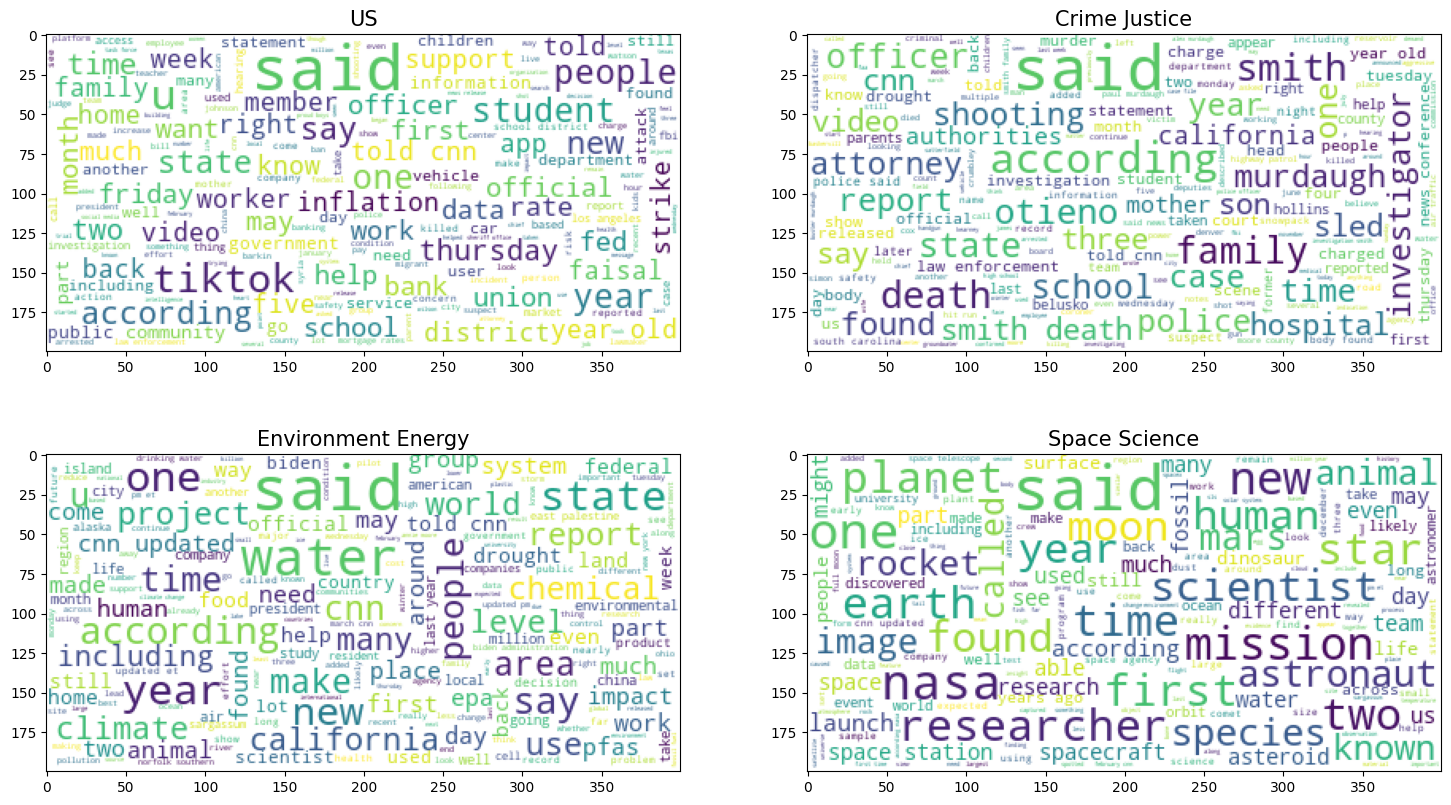

In [21]:
fig, axs = plt.subplots(2,2, figsize = (18,10))
cloud_title_list =['US', 'Crime Justice', 'Environment Energy', 'Space Science']
cloud_list =[us_wordcloud, cj_wordcloud, ee_wordcloud, ss_wordcloud]
m=0
for i in range(2):
    for j in range(2):
        axs[i][j].set_title(cloud_title_list[m], fontsize=15)
        axs[i][j].imshow(cloud_list[m])
        m+=1

In [22]:
unique_word_dataset=str(list(df2['Processed_Content'])).lower().split()

Text(0.5, 1.0, 'Common words that occurs in CNN')

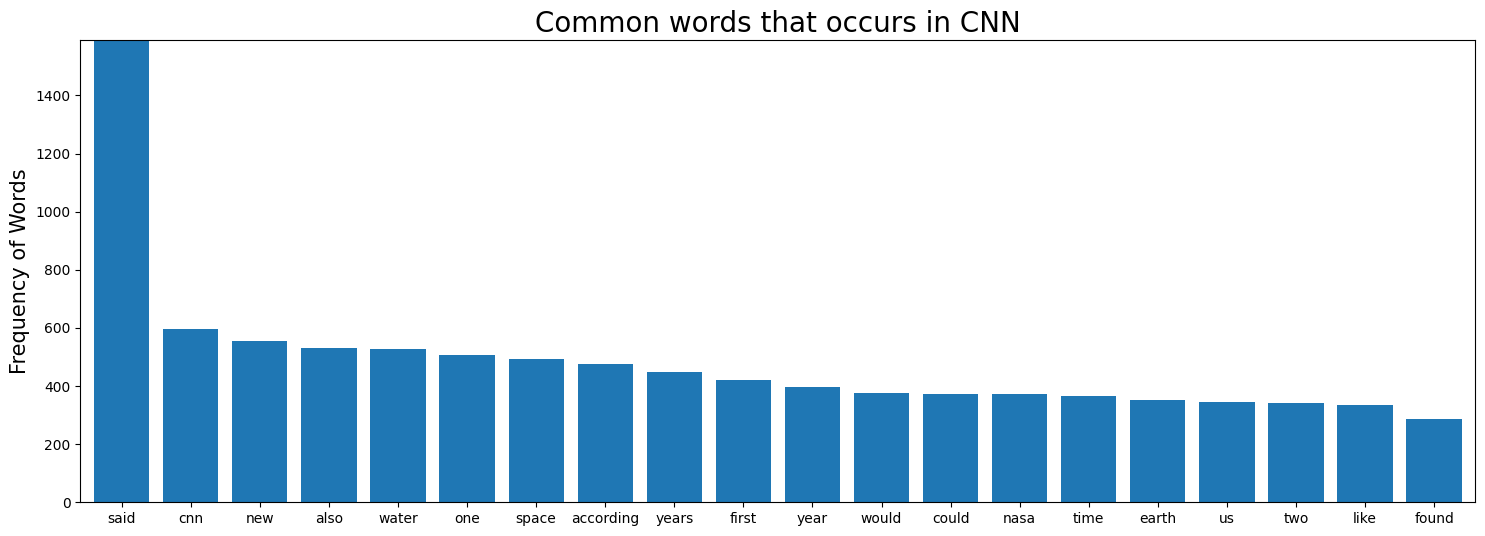

In [23]:
fig, ax1 = plt.subplots(figsize=(18, 6))
fake_x,fake_y = zip(*Counter(unique_word_dataset).most_common(20))
ax1.bar(fake_x,fake_y)
ax1.set_ylabel('Frequency of Words', fontsize=15)
ax1.margins(0.01,0)
plt.draw()
ax1.set_title('Common words that occurs in CNN', fontsize=20)

## Topic Modeling

In [24]:
import gensim
from gensim.utils import simple_preprocess
from gensim import corpora

In [25]:
def topic_modeling(texts, num):
    topic_list =[]
    tokenized_texts = [simple_preprocess(text) for text in texts]
    dictionary = corpora.Dictionary(tokenized_texts)
    doc_term_matrix = [dictionary.doc2bow(text) for text in tokenized_texts]
    lda_model = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=num, id2word=dictionary, passes=10)
    for i, topic in lda_model.show_topics(num_topics=num, formatted=False):
        topic_list.append(' '.join([word[0] for word in topic]))
    return topic_list

In [26]:
topic_list_us  = topic_modeling(df2_us['Processed_Content'], 2)
topic_list_cj  = topic_modeling(df2_cj['Processed_Content'], 2)
topic_list_ee  = topic_modeling(df2_ee['Processed_Content'], 2)
topic_list_ss  = topic_modeling(df2_ss['Processed_Content'], 2)

In [27]:
print('US: ', topic_list_us)
print('Crime Justice', topic_list_cj)
print('Energy Environment', topic_list_ee)
print('Social Science', topic_list_ss)

US:  ['said tiktok us district school workers union data thursday police', 'said year people one also would rates us state according']
Crime Justice ['said smith police school shooting death murdaugh report vehicle year', 'said smith death family according state cnn murdaugh otieno county']
Energy Environment ['water said climate project cnn environmental also pfas new according', 'cnn said new one says air also state according et']
Social Science ['space nasa said earth moon first mission cnn new one', 'said species years new like one found study also researchers']


In [28]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [29]:
def name_entity_gen(texted):
    name_entity_listed =[]
    doc = nlp(texted)
    for ent in doc.ents:
        name_entity_listed.append(ent.text)
    result_entity= ', '.join(name_entity_listed)
    return result_entity

In [48]:
def name_entity_label_gen(texted):
    name_entity_listed =[]
    doc = nlp(texted)
    for ent in doc.ents:
        name_entity_listed.append(ent.label_)
    result_entity= ' '.join(name_entity_listed)
    return result_entity

In [35]:
name_entity_list =[]
for i in range(len(df2)):
    name_entity_list.append(name_entity_gen(df2['content'][i]))

In [36]:
df2['Entity_Content'] = name_entity_list

In [49]:
name_entity_label_list =[]
for i in range(len(df2)):
    name_entity_label_list.append(name_entity_label_gen(df2['content'][i]))
df2['Entity_Label_Content'] = name_entity_label_list

In [63]:
us_label_entity= ' '.join(df2[df2.article=='us']['Entity_Label_Content'].values)
cj_label_entity= ' '.join(df2[df2.article=='crime justice']['Entity_Label_Content'].values)
ee_label_entity= ' '.join(df2[df2.article=='Enery Environment']['Entity_Label_Content'].values)
ss_label_entity= ' '.join(df2[df2.article=='Space Science']['Entity_Label_Content'].values)

In [71]:
def entity_label_counts(string):
    words = string.split()
    counts = {}
    for word in words:
        if word in counts:
            counts[word] += 1
        else:
            counts[word] = 1
    return counts

In [72]:
us_label_entity_list = entity_label_counts(us_label_entity)
cj_label_entity_list = entity_label_counts(cj_label_entity)
ee_label_entity_list = entity_label_counts(ee_label_entity)
ss_label_entity_list = entity_label_counts(ss_label_entity)

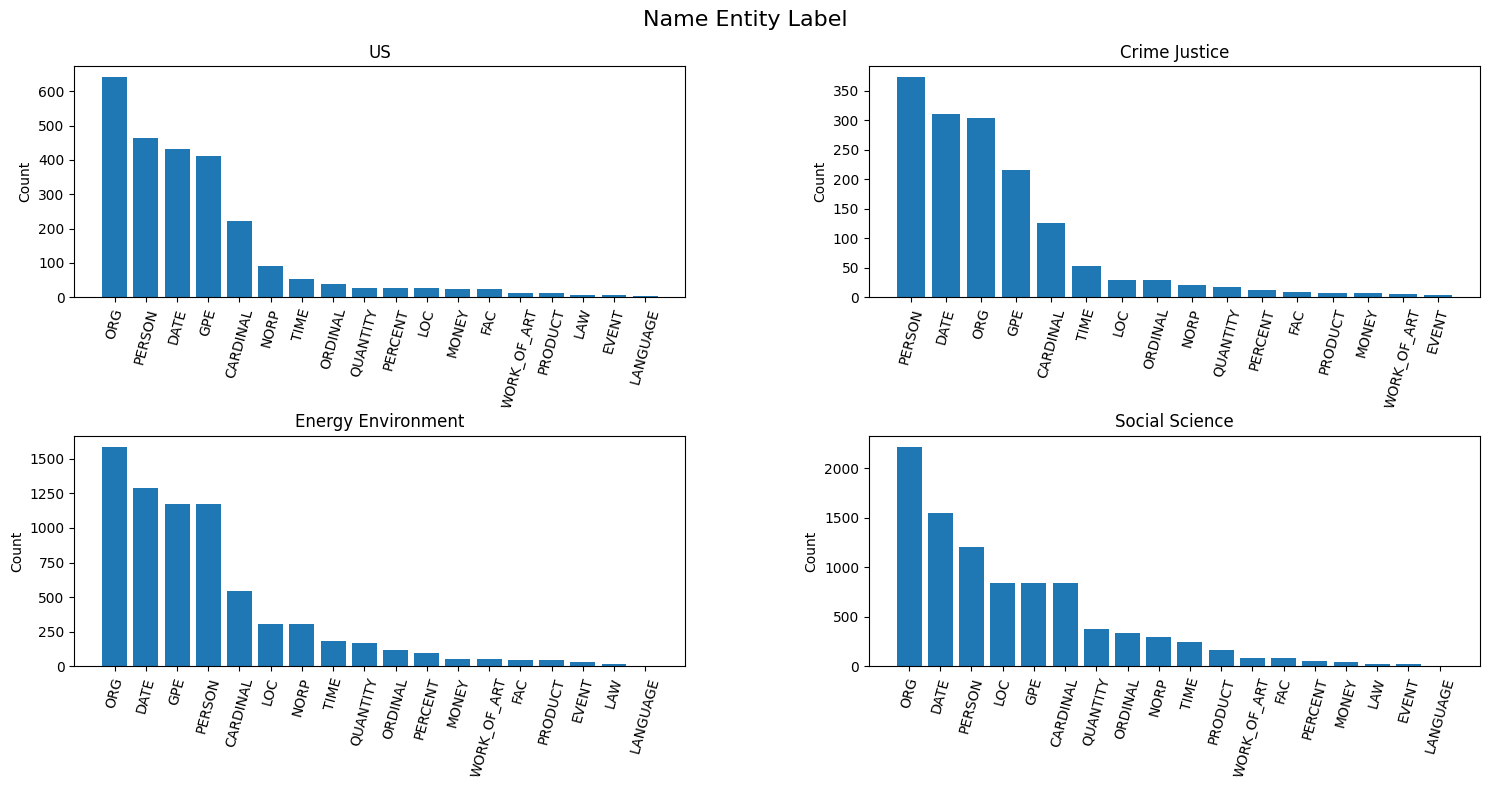

In [111]:
dicts = [us_label_entity_list, cj_label_entity_list, ee_label_entity_list, ss_label_entity_list]
Label_entity_title =['US', 'Crime Justice', 'Energy Environment', 'Social Science']
fig, axes = plt.subplots(2, 2,figsize=(15,8))
m =0
for ax, d in zip(axes.flat, dicts):
    sorted_dict = dict(sorted(d.items(), key=lambda x: x[1], reverse=True))
    ax.bar(sorted_dict.keys(), sorted_dict.values())
    ax.set_title(Label_entity_title[m])
    ax.set_ylabel('Count')
    plt.setp(ax.get_xticklabels(), rotation=75)
    m +=1
fig.suptitle('Name Entity Label', fontsize=16)

plt.tight_layout()
plt.subplots_adjust(hspace=0.6, wspace=0.3)
plt.show()